# Machine Learning - Fourth Assignment - Deep Learning

In [1]:
import os
import pickle
import glob
import numpy as np
from PIL import Image
from IPython.display import display


In [2]:
random_state = 1524401

# Load Images

In the first step the images are loaded from the five data_batch files and combined into one file.

Then the file is unpickled via the python 3 library pickle.py.

(“unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.)

https://docs.python.org/3/library/pickle.html





In [3]:
# The setting 'rb' is used to convert the byte stream (image file) into a byte-like object hierarchy.
def unpickle(file):
    byteObj = open(file, 'rb')
    imageObj = pickle.load(byteObj, encoding='bytes')
    return imageObj

In [4]:
# Read the data from the five data_batch files and join them into one file.
path = 'data/cifar-10-batches-py'
image_files = glob.glob(os.path.join(path, 'data_batch_*'))
print('Imported ' + str(len(image_files)) + ' files')

Imported 5 files


In [5]:
# Create a dictionary that contains all 50000 images with their respective labels and filenames.

empty_image_array = np.empty([0, 3072], dtype=np.ubyte)
image_data = {b'image_array': empty_image_array,
              b'image_labels': [],
              b'image_filenames': []
              }


image_labels = []
image_filenames = []

for image_file in image_files:
    
    image_data_unpickled = unpickle(image_file)

    image_filenames.extend(image_data_unpickled[b'filenames'])
    image_data[b'image_filenames'].extend(image_data_unpickled[b'filenames'])
    image_data[b'image_array'] = np.append(image_data[b'image_array'], image_data_unpickled[b'data'], axis=0)
    image_data.get(b"image_labels").extend(image_data_unpickled[b'labels'])

print('Image import successful!')
print('image_array: ' + str(len(image_data[b'image_array'])) +     '   image_labels: ' + str(len(image_data[b'image_labels'])) +      '   image_filenames: ' + str(len(image_data[b'image_filenames']))  )

print('One image contains ' + str(len(image_data[b'image_array'][0])) + ' data points.')
print('32 x 32 = 1024   -->   1024 x 3 colorChangels = 3072      (colorChangels = red, green, blue)')


Image import successful!
image_array: 50000   image_labels: 50000   image_filenames: 50000
One image contains 3072 data points.
32 x 32 = 1024   -->   1024 x 3 colorChangels = 3072      (colorChangels = red, green, blue)


The image_array is comprised of 50000 images. Each image consists of 1024 pixel (32x32 = 1024) and has three different colors (red, green, blue).

Therefore, each image has 3072 data points.

### Display first 10 images

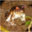

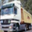

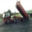

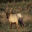

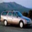

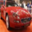

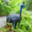

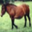

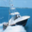

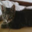

In [9]:
for show_images in image_data[b'image_array'][:10]: 
    red = np.asarray(np.split(show_images[0:1024], indices_or_sections=32))
    green = np.asarray(np.split(show_images[1024:2048], indices_or_sections=32))
    blue = np.asarray(np.split(show_images[2048:3072], indices_or_sections=32))
    red_image = Image.fromarray(red)
    green_image = Image.fromarray(green)
    blue_image = Image.fromarray(blue)
    image = Image.merge('RGB', (red_image, green_image, blue_image))
    display(image)

# Create the Groundtruth based on filenames